# Special thanks to https://github.com/masudakoji whose work is adapted here

C:\Users\Mohamadreza.a\miniconda3\envs\gmsjupyter\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


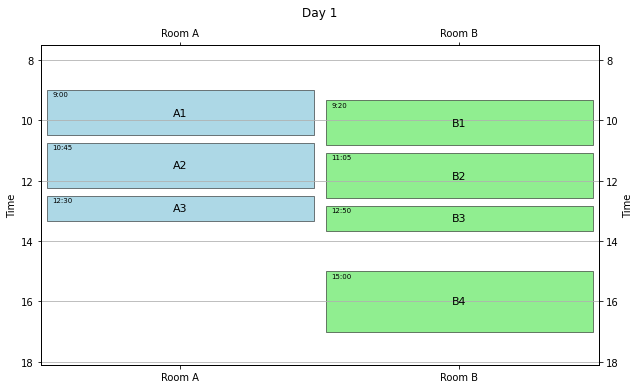

In [21]:
#!usr/bin/env python
#coding: utf-8
import matplotlib.pyplot as plt
# Asummed we have only two rooms
rooms=['Room A','Room B']
colors=['lightblue','lightgreen','pink', 'wheat', 'salmon']
 
input_files=['data_02.txt']
day_labels=['Day 1']
 
for input_file, day_label in zip(input_files, day_labels):
     fig=plt.figure(figsize=(10,5.89))
     for line in open(input_file, 'r'):
         data=line.split()
         event=data[-1]
         data=list(map(float, data[:-1]))
         room=data[0]-0.48
         start=data[1]+data[2]/60
         end=start+data[3]/60
         # plot event
         plt.fill_between([room, room+0.96], [start, start], [end,end], color=colors[int(data[0]-1)], edgecolor='k', linewidth=0.5)
         # plot beginning time
         plt.text(room+0.02, start+0.05 ,'{0}:{1:0>2}'.format(int(data[1]),int(data[2])), va='top', fontsize=7)
         # plot event name
         plt.text(room+0.48, (start+end)*0.5, event, ha='center', va='center', fontsize=11)
 
     # Set Axis
     ax=fig.add_subplot(111)
     ax.yaxis.grid()
     ax.set_xlim(0.5,len(rooms)+0.5)
     # our time intervals lies in [7.45 AM , 17 PM]    
     ax.set_ylim(18.1, 7.5)
     ax.set_xticks(range(1,len(rooms)+1))
     ax.set_xticklabels(rooms)
     ax.set_ylabel('Time')
 
     # Set Second Axis
     ax2=ax.twiny().twinx()
     ax2.set_xlim(ax.get_xlim())
     ax2.set_ylim(ax.get_ylim())
     ax2.set_xticks(ax.get_xticks())
     ax2.set_xticklabels(rooms)
     ax2.set_ylabel('Time')
 
 
     plt.title(day_label,y=1.07)
     plt.savefig('{0}.png'.format(day_label), dpi=200)